For each feature
For each possible split value
→ Compute impurity reduction

Pick the split with maximum reduction.

Dataset: Titanic Survival Dataset

In [1]:
import pandas as pd

df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Selection & Target Definition

We select a mix of numerical and categorical features to demonstrate:
- How trees handle mixed data types
- Why encoding is still required for sklearn trees

In [2]:
X = df[
    ["Pclass", "Sex", "Age", "Fare", "Embarked"]
]
y = df["Survived"]

In [3]:
categorical_features = ["Sex", "Embarked"]
numerical_features = ["Pclass", "Age", "Fare"]

In [8]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

print(categorical_cols)
print(numerical_cols)

Index(['Sex', 'Embarked'], dtype='object')
Index(['Pclass', 'Age', 'Fare'], dtype='object')


## Preprocessing Strategy (Production-Ready)

Although decision trees do not require feature scaling, they **cannot handle categorical strings**.
We use:
- Numerical features → passthrough
- Categorical features → OneHotEncoding (handle_unknown='ignore')

All preprocessing is done **inside a pipeline** to avoid data leakage.

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

## Baseline Decision Tree Model

We start with a constrained tree to avoid immediate overfitting.
Key regularization choices:
- max_depth
- min_samples_leaf

In [11]:
pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=10,
        random_state=42
    ))
])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7877094972067039


## Overfitting Diagnosis (Train vs Test)

Decision Trees are high-variance models.
We explicitly compare training and test accuracy to detect overfitting.

In [33]:
from sklearn.metrics import accuracy_score

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Train accuracy: 0.8539325842696629
Test accuracy: 0.7877094972067039


Train ≫ Test → overfitting
Both low → underfitting
Close & high → acceptable

In [34]:
depths = range(1, 21)
train_scores = []
test_scores = []

for d in depths:
    pipe.set_params(model__max_depth=d)
    pipe.fit(X_train, y_train)

    train_scores.append(
        accuracy_score(y_train, pipe.predict(X_train))
    )
    test_scores.append(
        accuracy_score(y_test, pipe.predict(X_test))
    )

## Bias–Variance Tradeoff in Trees

We vary tree depth to observe:
- Increasing training accuracy
- A peak and decline in test accuracy

This visualizes why single trees are unstable.

In [35]:
import matplotlib.pyplot as plt

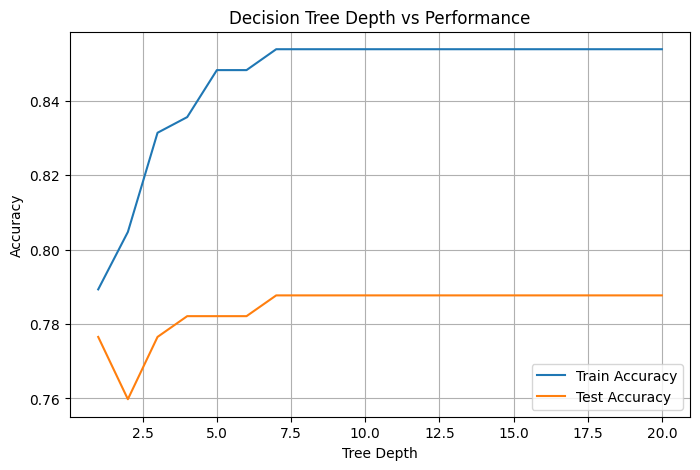

In [36]:
plt.figure(figsize=(8, 5))

plt.plot(depths, train_scores, label="Train Accuracy")
plt.plot(depths, test_scores, label="Test Accuracy")

plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Depth vs Performance")

plt.legend()
plt.grid(True)

plt.show()

## Hyperparameter Tuning with Cross-Validation

Tree performance is highly sensitive to hyperparameters.
We use GridSearchCV to find a bias–variance optimal configuration.

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__max_depth": [2, 3, 5, 7, 10],
    "model__min_samples_leaf": [5, 10, 20, 50],
    "model__min_samples_split": [2, 10, 20]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("CV score:", grid.best_score_)

Best params: {'model__max_depth': 7, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}
CV score: 0.8104501132670145


If you don’t CV a tree, you didn’t train a tree.

## Feature Importance Analysis (With Caution)

Tree-based feature importance reflects impurity reduction.
Important limitations:
- Biased toward continuous features
- Unstable under correlation
- Not causal

In [38]:
best_tree = grid.best_estimator_.named_steps["model"]
importances = best_tree.feature_importances_

In [39]:
feature_names = grid.best_estimator_ \
    .named_steps["preprocess"] \
    .get_feature_names_out()

In [40]:
import pandas as pd

fi = pd.Series(importances, index=feature_names)
fi.sort_values(ascending=False).head(10)

cat__Sex_male        0.479698
num__Pclass          0.166860
num__Fare            0.162395
num__Age             0.155659
cat__Embarked_S      0.035388
cat__Sex_female      0.000000
cat__Embarked_C      0.000000
cat__Embarked_Q      0.000000
cat__Embarked_nan    0.000000
dtype: float64

In [41]:
pipe.set_params(model__random_state=0)
pipe.fit(X_train, y_train)

accuracy_score(y_test, pipe.predict(X_test))

0.7877094972067039